### Dataset dictionary

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
sns.set_theme()
os.getcwd()


'/Users/vladislavpleshko/amazinum'

In [6]:
path = "/Users/vladislavpleshko/amazinum/data/Car_Insurance_Claim.csv"

In [7]:
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0","ID","POSTAL_CODE"],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  9950 non-null   object
 1   GENDER               9950 non-null   object
 2   RACE                 9951 non-null   object
 3   DRIVING_EXPERIENCE   9950 non-null   object
 4   EDUCATION            9951 non-null   object
 5   INCOME               10000 non-null  object
 6   CREDIT_SCORE         8978 non-null   object
 7   VEHICLE_OWNERSHIP    9950 non-null   object
 8   VEHICLE_YEAR         9950 non-null   object
 9   MARRIED              9952 non-null   object
 10  CHILDREN             9950 non-null   object
 11  ANNUAL_MILEAGE       9000 non-null   object
 12  VEHICLE_TYPE         9951 non-null   object
 13  SPEEDING_VIOLATIONS  9950 non-null   object
 14  DUIS                 9950 non-null   object
 15  PAST_ACCIDENTS       9950 non-null   object
 16  OUTCO

In [8]:
df.isnull().sum()

AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

In [44]:
df.dropna(inplace = True)
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [10]:
encode_dict = {"DRIVING_EXPERIENCE": {"0-9y": 0, "10-19y": 1, "20-29y": 3, "30y+": 4},
                   "EDUCATION": {"none": 0, "high school": 1, "university": 2},
                   "INCOME": {"poverty": 0, "working class": 1, "upper class": 2, "middle class": 3},
                   "VEHICLE_YEAR": {"before 2015": 0, "after 2015": 1},
                   "VEHICLE_TYPE": {"sedan": 0, "sports car": 1},
                   "GENDER":{"female":0,"male":1},
                   "AGE":{"16-25":0, "26-39":1, "40-64":2, "65+":3}
                   }
df = df.replace(encode_dict)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7526 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  7526 non-null   object
 1   GENDER               7526 non-null   object
 2   RACE                 7526 non-null   object
 3   DRIVING_EXPERIENCE   7526 non-null   object
 4   EDUCATION            7526 non-null   int64 
 5   INCOME               7526 non-null   int64 
 6   CREDIT_SCORE         7526 non-null   object
 7   VEHICLE_OWNERSHIP    7526 non-null   object
 8   VEHICLE_YEAR         7526 non-null   object
 9   MARRIED              7526 non-null   object
 10  CHILDREN             7526 non-null   object
 11  ANNUAL_MILEAGE       7526 non-null   object
 12  VEHICLE_TYPE         7526 non-null   object
 13  SPEEDING_VIOLATIONS  7526 non-null   object
 14  DUIS                 7526 non-null   object
 15  PAST_ACCIDENTS       7526 non-null   object
 16  OUTCOME    

/var/folders/gc/s2x5tzvj4dz9sgc9x_cvglz80000gn/T/ipykernel_26718/2444524354.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encode_dict)


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,majority,0,1,2,0.629027313918201,1.0,1,0.0,1.0,12000.0,0,0,0,0,0.0
1,0,1,majority,0,0,0,0.3577571170184627,0.0,0,0.0,0.0,16000.0,0,0,0,0,1.0
2,0,0,majority,0,1,1,0.4931457852181982,1.0,0,0.0,0.0,11000.0,0,0,0,0,0.0
3,0,1,majority,0,2,1,0.2060128507324556,1.0,0,0.0,none,11000.0,0,0,0,0,0.0
4,1,1,majority,1,0,1,0.3883658881572184,1.0,0,0.0,0.0,12000.0,0,2,0,1,1.0


In [11]:
num_cols = ["AGE","GENDER","DRIVING_EXPERIENCE", "EDUCATION", "INCOME", "VEHICLE_YEAR", "VEHICLE_TYPE","CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME","VEHICLE_OWNERSHIP","MARRIED","CHILDREN"]
df[num_cols] = df[num_cols].apply(pd.to_numeric,errors="coerce")
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7526 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  7494 non-null   float64
 1   GENDER               7490 non-null   float64
 2   RACE                 7526 non-null   object 
 3   DRIVING_EXPERIENCE   7488 non-null   float64
 4   EDUCATION            7526 non-null   int64  
 5   INCOME               7526 non-null   int64  
 6   CREDIT_SCORE         7478 non-null   float64
 7   VEHICLE_OWNERSHIP    7485 non-null   float64
 8   VEHICLE_YEAR         7489 non-null   float64
 9   MARRIED              7489 non-null   float64
 10  CHILDREN             7487 non-null   float64
 11  ANNUAL_MILEAGE       7487 non-null   float64
 12  VEHICLE_TYPE         7494 non-null   float64
 13  SPEEDING_VIOLATIONS  7486 non-null   float64
 14  DUIS                 7489 non-null   float64
 15  PAST_ACCIDENTS       7495 non-null   float6

AGE                    32
GENDER                 36
RACE                    0
DRIVING_EXPERIENCE     38
EDUCATION               0
INCOME                  0
CREDIT_SCORE           48
VEHICLE_OWNERSHIP      41
VEHICLE_YEAR           37
MARRIED                37
CHILDREN               39
ANNUAL_MILEAGE         39
VEHICLE_TYPE           32
SPEEDING_VIOLATIONS    40
DUIS                   37
PAST_ACCIDENTS         31
OUTCOME                40
dtype: int64

In [12]:
num_cols = df.select_dtypes(include=[float,int])

for column in num_cols:
    print(f"\n {column} distribution: \n", df[column].value_counts())


 AGE distribution: 
 AGE
1.0    2290
2.0    2186
3.0    1514
0.0    1504
Name: count, dtype: int64

 GENDER distribution: 
 GENDER
0.0    3748
1.0    3742
Name: count, dtype: int64

 DRIVING_EXPERIENCE distribution: 
 DRIVING_EXPERIENCE
0.0    2641
1.0    2456
3.0    1594
4.0     797
Name: count, dtype: int64

 EDUCATION distribution: 
 EDUCATION
1    3125
2    2939
0    1462
Name: count, dtype: int64

 INCOME distribution: 
 INCOME
2    3296
3    1588
0    1366
1    1276
Name: count, dtype: int64

 CREDIT_SCORE distribution: 
 CREDIT_SCORE
0.629027    1
0.717919    1
0.489533    1
0.307123    1
0.235529    1
           ..
0.847325    1
0.622098    1
0.270252    1
0.347195    1
0.435225    1
Name: count, Length: 7478, dtype: int64

 VEHICLE_OWNERSHIP distribution: 
 VEHICLE_OWNERSHIP
1.0    5233
0.0    2252
Name: count, dtype: int64

 VEHICLE_YEAR distribution: 
 VEHICLE_YEAR
0.0    5190
1.0    2299
Name: count, dtype: int64

 MARRIED distribution: 
 MARRIED
0.0    3745
1.0    3744
Na

In [13]:
cat_cols = df.select_dtypes(include=[object])

for column in cat_cols:
    print(f"\n {column} distribution: \n", df[column].value_counts())


 RACE distribution: 
 RACE
majority    6733
minority     762
none          31
Name: count, dtype: int64


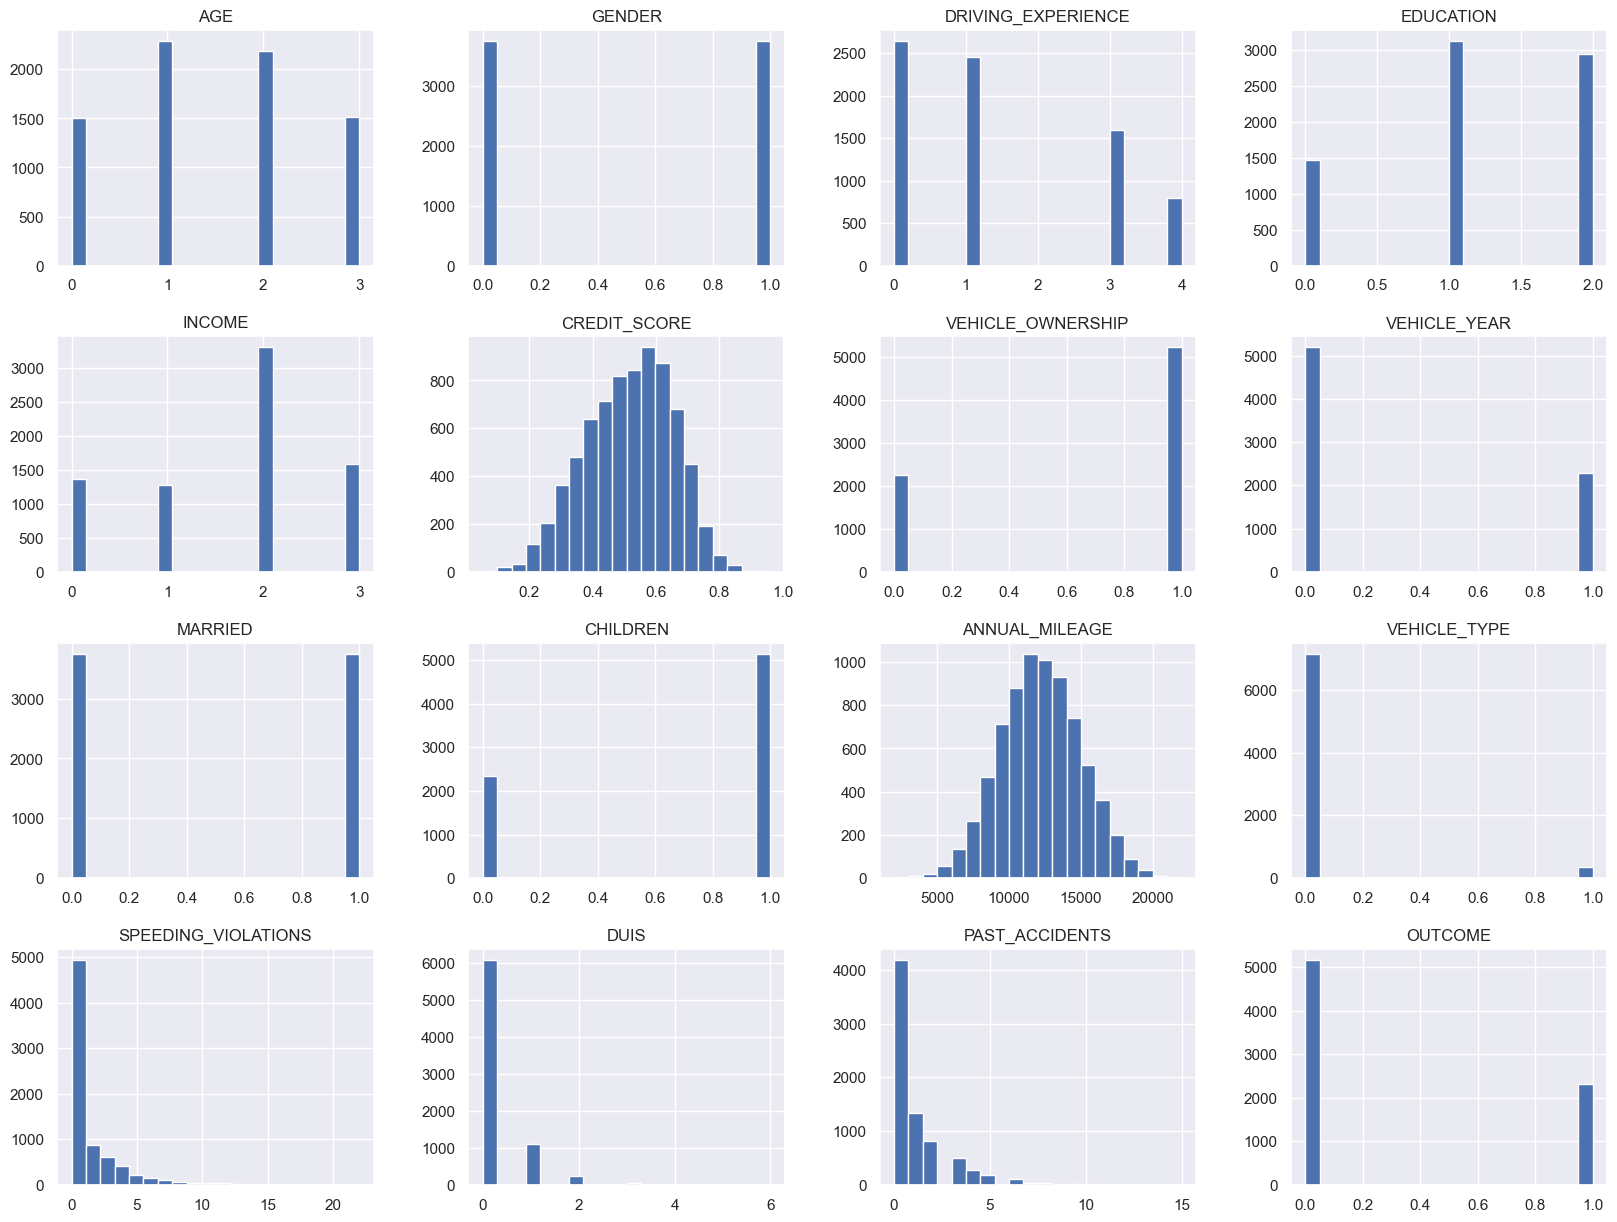

In [14]:
df.hist(figsize=(20,15),bins=20)
plt.show()

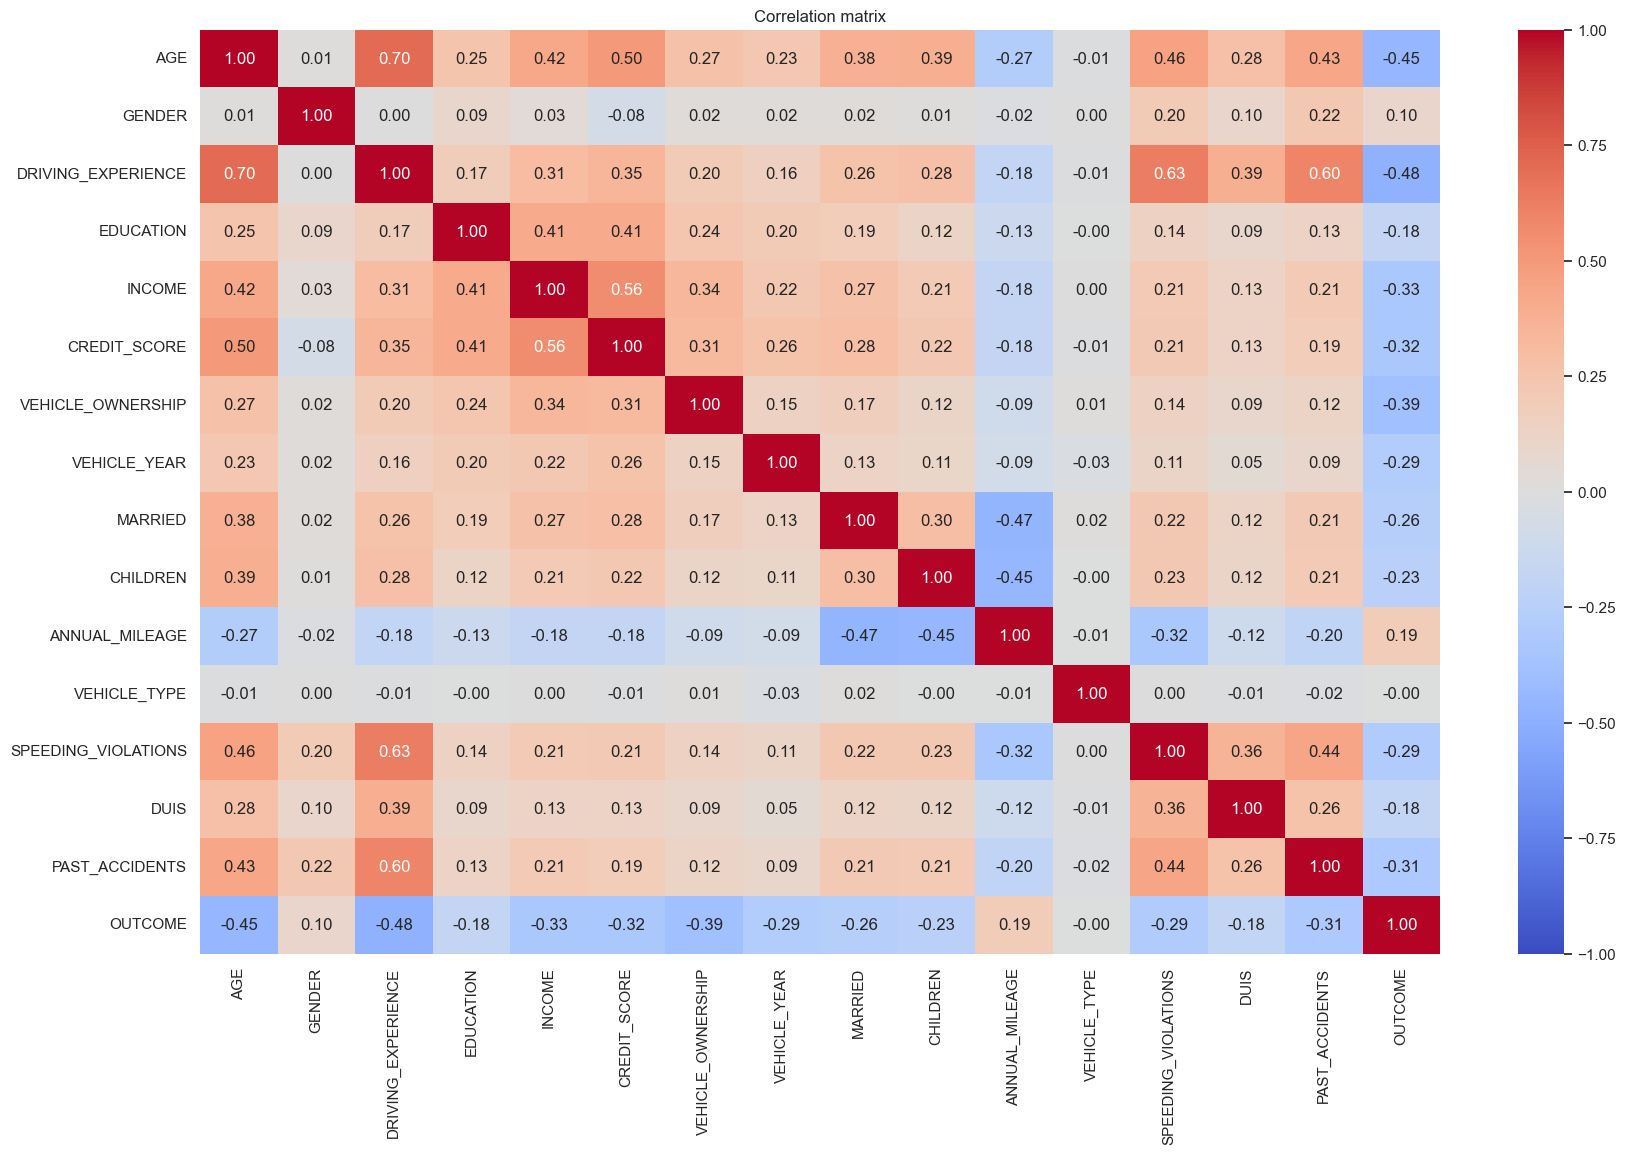

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(num_cols.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [16]:
i = num_cols.corr()
i["OUTCOME"]

AGE                   -0.445662
GENDER                 0.100005
DRIVING_EXPERIENCE    -0.479511
EDUCATION             -0.178551
INCOME                -0.325830
CREDIT_SCORE          -0.323087
VEHICLE_OWNERSHIP     -0.386797
VEHICLE_YEAR          -0.286988
MARRIED               -0.260381
CHILDREN              -0.234935
ANNUAL_MILEAGE         0.194441
VEHICLE_TYPE          -0.002544
SPEEDING_VIOLATIONS   -0.293506
DUIS                  -0.184766
PAST_ACCIDENTS        -0.313811
OUTCOME                1.000000
Name: OUTCOME, dtype: float64

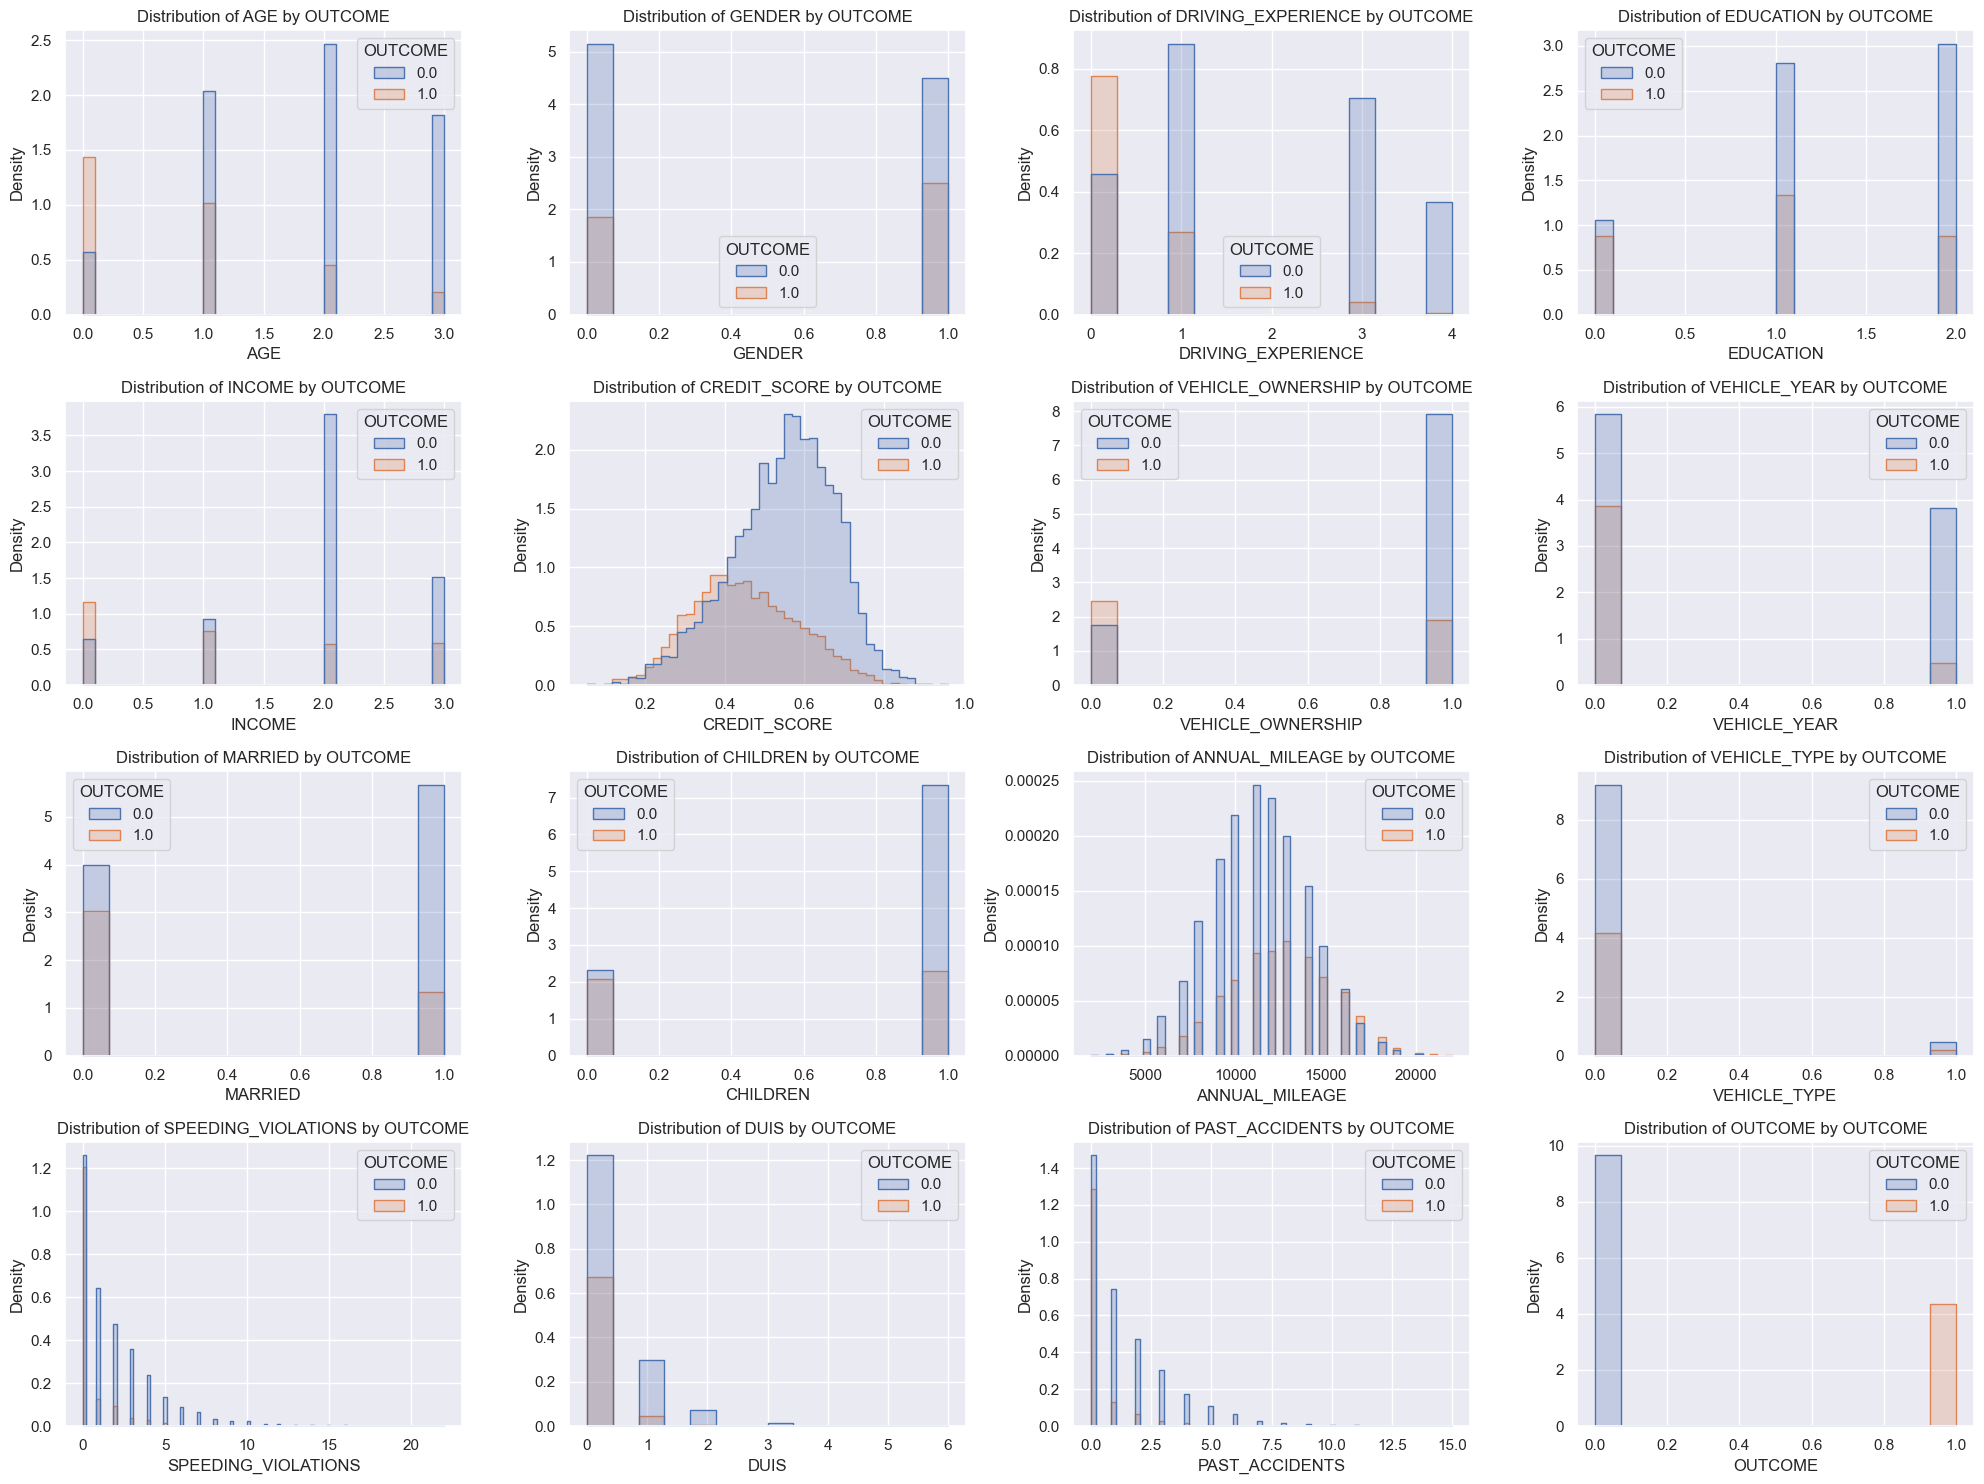

In [17]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(df, x=col, hue="OUTCOME", element="step", stat="density")
    plt.title(f"Distribution of {col} by OUTCOME")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


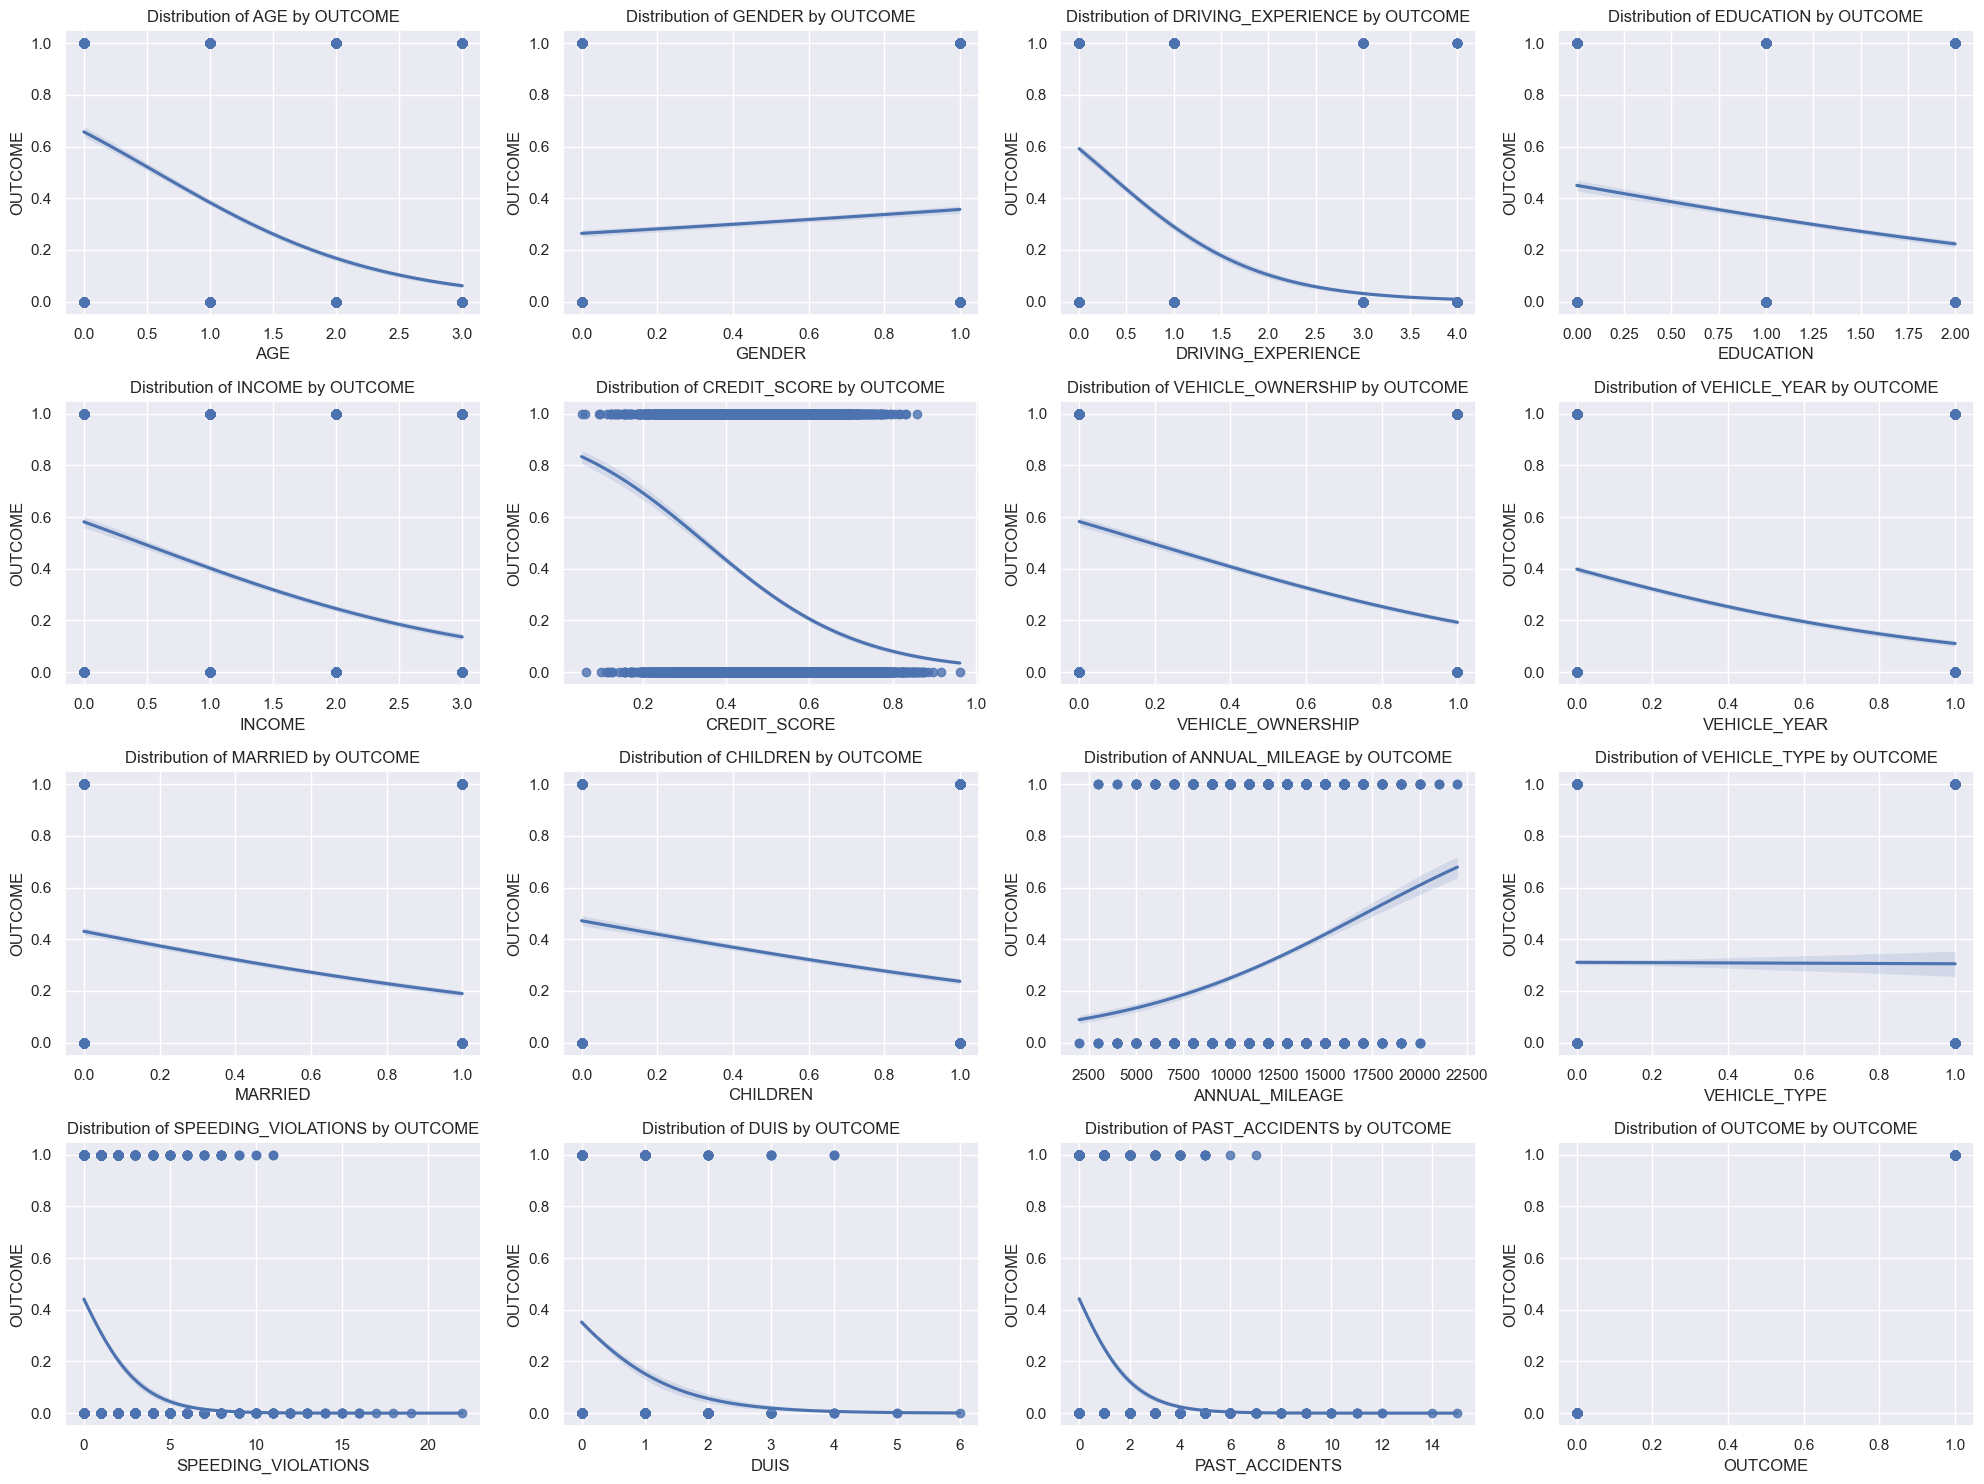

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  
    sns.regplot(data=df, x=col, y="OUTCOME", logistic=True)
    plt.title(f"Distribution of {col} by OUTCOME")

plt.tight_layout()
plt.show()

In [46]:
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64